In [1]:
import numpy as np
import cv2
import PIL.Image as Image
from IPython.display import display
import matplotlib.pyplot as plt
import math

# Lọc thông thấp:


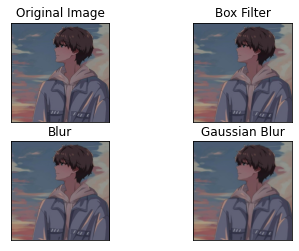

In [4]:
img = cv2.imread('xau.jpg', 1) # takes img as bgr
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

linear_filter = cv2.boxFilter(img, -1, (3,3)) #linear filter

blur = cv2.blur(img, (3,3))

gaussian = cv2.GaussianBlur(img, (7,7), 0)

titles = ['Original Image', 'Box Filter', 'Blur', 'Gaussian Blur']
outputs = [img, linear_filter, blur, gaussian]

for i in range(4):
    plt.subplot(2, 2, i+1) 
    plt.imshow(outputs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Lọc thông cao

In [10]:
def loc_thong_cao_butterworth(i, d, n):
    F = np.fft.fft2(i)
    M, N = i.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            t = ((u-M/2)**2+(v-N/2)**2)**0.5
            H[u, v] = (1/(1+(d/t)**(2*n)))
    G = H*F
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.ifft2(G)))**2))
    plt.show()

In [16]:
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.imread("img.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

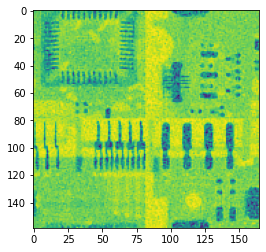

In [17]:
loc_thong_cao_butterworth(img_gray, 30, 2)

In [18]:
def loc_thong_cao_butterworth(i, d, n):
    F = np.fft.fft2(i)
    M, N = i.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            t = ((u-M/2)**2+(v-N/2)**2)**0.5
            H[u, v] = (1/(1+(d/t)**(2*n)))
    G = H*F
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.ifft2(G)))**2))
    plt.show()

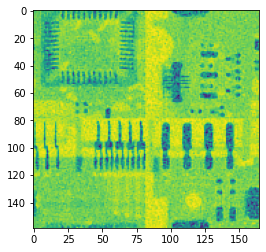

In [19]:
loc_thong_cao_butterworth(img_gray, 30, 2)

In [20]:
def loc_thong_cao_gaussian(i, d):
    F = np.fft.fft2(i)
    M, N = i.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            t = ((u-M/2)**2+(v-N/2)**2)**0.5
            H[u, v] = 1-np.exp(-t**2/(2*(d**2)))
    G = H*F
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.ifft2(G)))**2))
    plt.show()


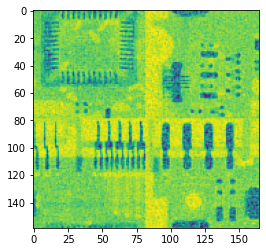

In [21]:
loc_thong_cao_gaussian(img_gray, 30)